##**Trabajo Análisis de Datos**

###**Introducción**

La finalidad de este desafío es ayudar al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para este propósito, analizaré los datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store que el posee. Mi objetivo será identificar la tienda menos eficiente y presentar una recomendación final al Sr. Juan basada en todo el análisis realizado.

##**Importación de datos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# URLs de los datos
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

In [2]:
# Cargar datos
tienda_1 = pd.read_csv(url)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

In [3]:
tienda_1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


###**1. Ingreso total por cada tienda**

En este paso, calcularé el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos de éstas, los que serán visualizados en una tabla comparativa y una gráfica por colores, con la finlidad de ver cual es la tienda que menos ingresos registra.

In [4]:
# Lista de tiendas y nombres
tiendas = [tienda_1, tienda_2, tienda_3, tienda_4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Validar que la columna "Precio" exista en cada tienda
for tienda, nombre in zip(tiendas, nombres_tiendas):
    if "Precio" not in tienda.columns:
        print(f"La columna 'Precio' no existe en {nombre}.")

In [5]:
# Resultados
resultados = []

# Calcular totales de ventas
for tienda, nombre in zip(tiendas, nombres_tiendas):
    # Sumar precio, ignorando NaN
    total_ventas = tienda["Precio"].dropna().sum()
    resultados.append({"Tienda": nombre, "Ingreso Total": total_ventas})

     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09




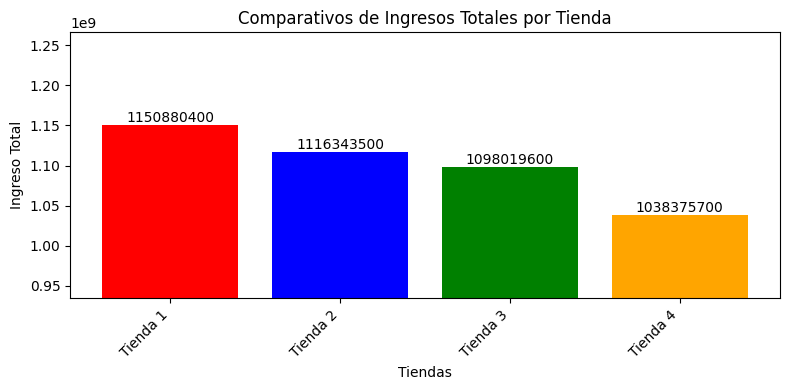

In [6]:
# Crear DataFrame
df_resultados = pd.DataFrame(resultados)
print(df_resultados)
print("\n")

# Configurar gráfica
plt.figure(figsize=(8, 4))
bars = plt.bar(df_resultados["Tienda"], df_resultados["Ingreso Total"], color=["red", "blue", "green", "orange"])

# Agregar etiquetas de datos
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

# Ajustar el rango del eje Y
plt.ylim(0.9 * df_resultados["Ingreso Total"].min(), 1.1 * df_resultados["Ingreso Total"].max())

# Etiquetas y título
plt.xlabel("Tiendas")
plt.ylabel("Ingreso Total")
plt.title("Comparativos de Ingresos Totales por Tienda")

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha="right")

# Ajustar espaciado
plt.tight_layout()

# Mostrar gráfica
plt.show()

###**2. Ventas por categoría**

En este siguiente paso, calcularé la cantidad de productos vendidos por categoría en cada tienda. Agruparé los datos por categoría para contar el número de ventas de cada tipo, mostrando con ello las categorías más populares de cada tienda.

Categorías más Populares por Tiendas
               Categoría  Cantidad    Tienda
0                Muebles       465  Tienda 1
1           Electrónicos       448  Tienda 1
2               Juguetes       324  Tienda 1
3      Electrodomésticos       312  Tienda 1
4   Deportes y diversión       284  Tienda 1
8                Muebles       442  Tienda 2
9           Electrónicos       422  Tienda 2
10              Juguetes       313  Tienda 2
11     Electrodomésticos       305  Tienda 2
12  Deportes y diversión       275  Tienda 2
16               Muebles       499  Tienda 3
17          Electrónicos       451  Tienda 3
18              Juguetes       315  Tienda 3
19     Electrodomésticos       278  Tienda 3
20  Deportes y diversión       277  Tienda 3
24               Muebles       480  Tienda 4
25          Electrónicos       451  Tienda 4
26              Juguetes       338  Tienda 4
27  Deportes y diversión       277  Tienda 4
28     Electrodomésticos       254  Tienda 4




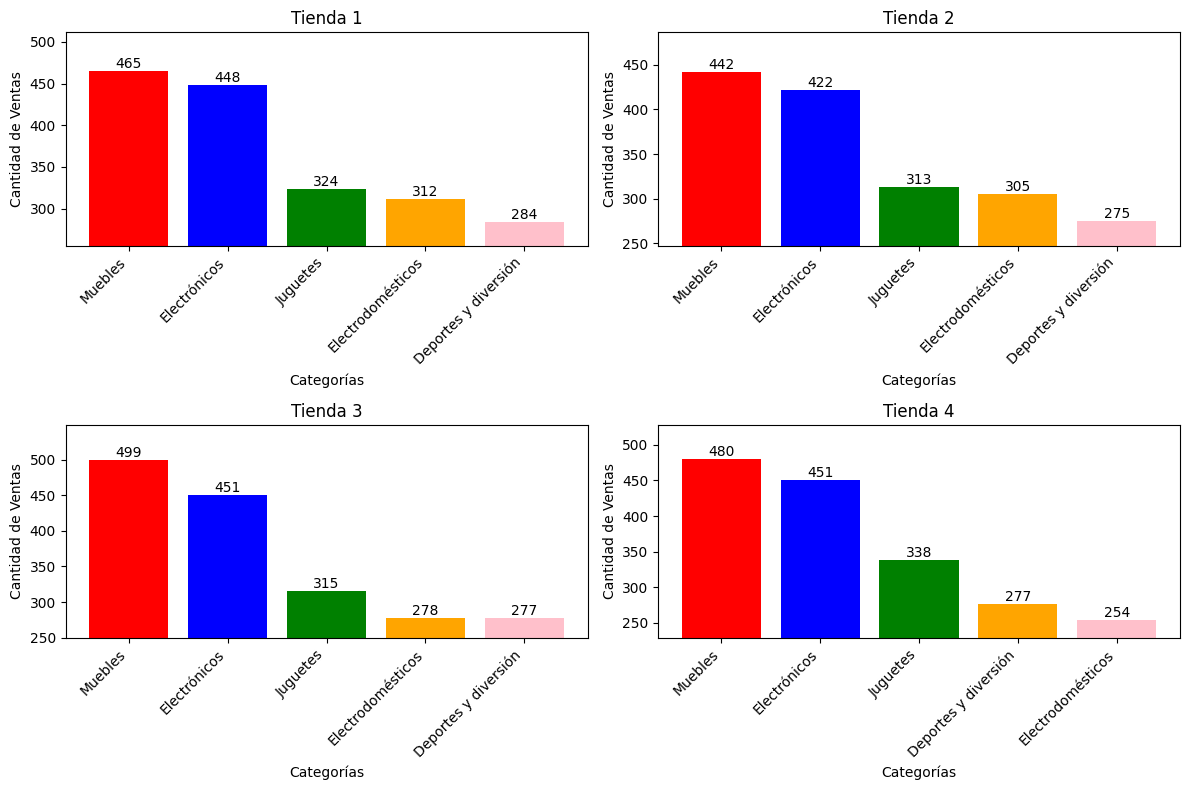

In [7]:
# Resultados finales
ventas_por_categoria = []

# Iterar sobre cada tienda
for tienda, nombre in zip(tiendas, nombres_tiendas):
    # Agrupar por categoría y contar las ventas
    ventas_por_tienda = tienda['Categoría del Producto'].value_counts().reset_index()
    ventas_por_tienda.columns = ['Categoría', 'Cantidad']
    ventas_por_tienda['Tienda'] = nombre

    # Agregar resultados a la lista
    ventas_por_categoria.append(ventas_por_tienda)

# Concatenar todos los DataFrames en uno solo
df_ventas_por_categoria = pd.concat(ventas_por_categoria, ignore_index=True)

# Ordenar por cantidad de ventas descendentes
df_ventas_por_categoria = df_ventas_por_categoria.sort_values(by=["Tienda", "Cantidad"], ascending=[True, False])

# Mostrar las 5 categorías mas populares de cada tienda
categorias_mas_populares = df_ventas_por_categoria.groupby('Tienda').head(5)

# Imprimir resultados
print("Categorías más Populares por Tiendas")
print(categorias_mas_populares)
print("\n")

# Configurar gráfica
plt.figure(figsize=(12, 8))

# Iterar sobre cada tienda y graficar
for i, nombre in enumerate(nombres_tiendas):
    # Filtrar datos para la tienda actual
    datos_tienda = categorias_mas_populares[categorias_mas_populares['Tienda'] == nombre]

    # Graficar
    plt.subplot(2, 2, i + 1) # 2x2 grid de subgráficas
    bars = plt.bar(datos_tienda['Categoría'], datos_tienda['Cantidad'], color=["red", "blue", "green", "orange", "pink"])

    # Agregar etiquetas de datos
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

        # Ajustar el rango del eje Y
        min_value = datos_tienda["Cantidad"].min()
        max_value = datos_tienda["Cantidad"].max()
        plt.ylim(min_value * 0.9, max_value * 1.1)


    plt.title(f"{nombre}")
    plt.xlabel("Categorías")
    plt.ylabel("Cantidad de Ventas")
    plt.xticks(rotation=45, ha="right")

# Ajustar espaciado
plt.tight_layout()

# Mostrar gráfica
plt.show()

###**3. Utilidad después de costos de envío**

A continuación generaré y graficaré una nueva columna, la cual será el resultado de descontar el Costo de envío al Precio, con la finalidad de corroborar si la Tienda 4 continua siendo la tienda con menores ingresos.


DataFrame de Utilidades:
     Tienda  Ingreso Total  Costo de Envío Total  Utilidad Total
0  Tienda 1   1.150880e+09            61377900.0    1.089502e+09
1  Tienda 2   1.116344e+09            59485100.0    1.056858e+09
2  Tienda 3   1.098020e+09            58516600.0    1.039503e+09
3  Tienda 4   1.038376e+09            55317400.0    9.830583e+08




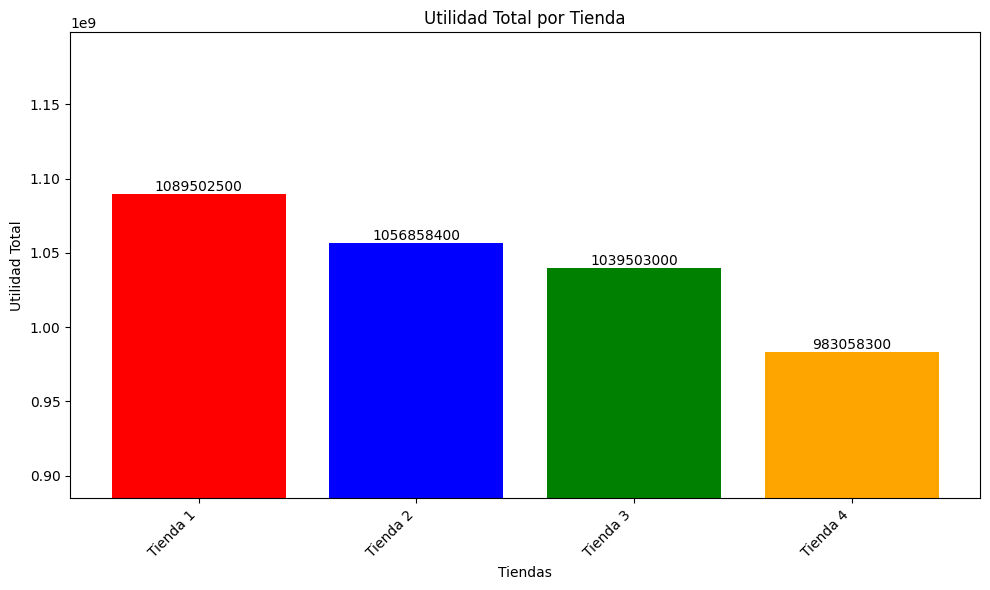

In [8]:
# Calculo de utilidad por tienda
utilidades_por_tienda = []

# Iterar sobre cada tienda
for tienda, nombre in zip(tiendas, nombres_tiendas):
    # Crear columna de utilidad
    tienda['Utilidad'] = tienda['Precio'] - tienda['Costo de envío']

    # Ingreso total
    ingreso_total = tienda['Precio'].sum()

    # Costo total de envío
    costo_envio_total = tienda['Costo de envío'].sum()

    # Utilidad total
    utilidad_total = tienda['Utilidad'].sum()

    # Guardar resultados
    utilidades_por_tienda.append({
        'Tienda': nombre,
        'Ingreso Total': ingreso_total,
        'Costo de Envío Total': costo_envio_total,
        'Utilidad Total': utilidad_total
    })

# Crear DataFrame
df_utilidades_por_tienda = pd.DataFrame(utilidades_por_tienda)

# Ordenar por utilidad total descendente
df_utilidades_por_tienda = df_utilidades_por_tienda.sort_values(by='Utilidad Total', ascending=False)

# Mostrar DataFrame de utilidades
print("\nDataFrame de Utilidades:")
print(df_utilidades_por_tienda)
print("\n")

# -----------------------------
# Gráfica de utilidades Totales
# -----------------------------

# Configurar gráfica
plt.figure(figsize=(10, 6))
bars = plt.bar(df_utilidades_por_tienda['Tienda'], df_utilidades_por_tienda['Utilidad Total'], color=["red", "blue", "green", "orange"])

# Agregar etiquetas de datos
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

# Ajustar el rango del eje Y
plt.ylim(0.9 * df_utilidades_por_tienda['Utilidad Total'].min(), 1.1 * df_utilidades_por_tienda['Utilidad Total'].max())

# Etiquetas y título
plt.title("Utilidad Total por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Utilidad Total")
plt.xticks(rotation=45, ha="right")

# Ajustar espaciado
plt.tight_layout()

# Mostrar gráfica
plt.show()

###**4. Valoración media por tienda**

A continuación calcularé las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

Promedio de Calificaciones por Tienda:
     Tienda  Calificación Promedio
2  Tienda 3               4.048326
1  Tienda 2               4.037304
3  Tienda 4               3.995759
0  Tienda 1               3.976685




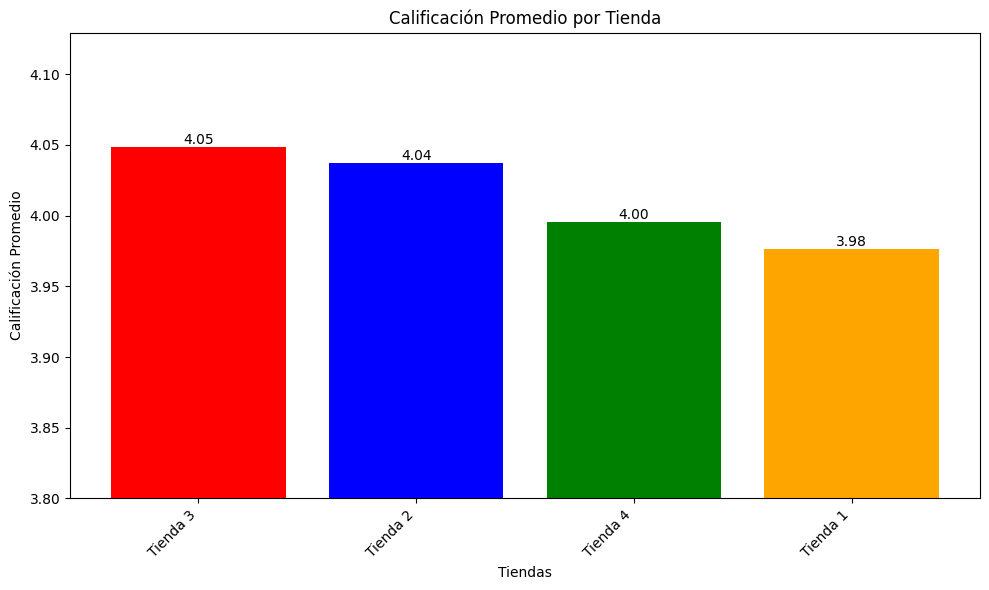

In [9]:
# Calificación promedio
calificacion_promedio = []

# Iterar sobre cada tienda
for tienda, nombre in zip(tiendas, nombres_tiendas):
    # Calcular el promedio de las calificaciones, ignorando NaN
    promedio_calificacion = tienda["Calificación"].mean()

    # Agregar resultados a la lista
    calificacion_promedio.append({"Tienda": nombre, "Calificación Promedio": promedio_calificacion})

# Crear DataFrame
df_calificacion_promedio = pd.DataFrame(calificacion_promedio)

# Ordenar por calificación promedio descendente
df_calificacion_promedio = df_calificacion_promedio.sort_values(by="Calificación Promedio", ascending=False)

# Mostrar DataFrame
print("Promedio de Calificaciones por Tienda:")
print(df_calificacion_promedio)
print("\n")

# -----------------------------
# Gráfica de Calificaciones Promedio
# -----------------------------

# Configurar gráfica
plt.figure(figsize=(10, 6))
bars = plt.bar(df_calificacion_promedio["Tienda"], df_calificacion_promedio["Calificación Promedio"], color=["red", "blue", "green", "orange"])

# Agregar etiquetas de datos
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

    # Ajustar el rango del eje Y
    plt.ylim(3.8, df_calificacion_promedio["Calificación Promedio"].max() * 1.02) # Comienza en 3.5 y termina ligeramente por encima del máximo

# Etiquetas y título

plt.title("Calificación Promedio por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Calificación Promedio")
plt.xticks(rotation=45, ha="right")

# Ajustar espaciado
plt.tight_layout()

# Mostrar gráfica
plt.show()

###**5. Productos más vendidos y menos vendidos**

En este paso, identificaré qué productos fueron los más vendidos y los menos vendidos en cada tienda. Presentaré gráficas de los 5 productos más vendidos y de los 5 menos vendidos en cada tienda.

Productos con Mayor Ingreso:
            Producto  Ingreso Total    Tienda
0      TV LED UHD 4K    142150200.0  Tienda 1
1       Refrigerador    112143300.0  Tienda 1
2          Iphone 15     97902200.0  Tienda 1
3           Smart TV     67452100.0  Tienda 1
4   Lavadora de ropa     65783600.0  Tienda 1
5          Iphone 15    113225800.0  Tienda 2
6      TV LED UHD 4K    103375000.0  Tienda 2
7       Refrigerador     97632500.0  Tienda 2
8   Lavadora de ropa     66762300.0  Tienda 2
9           Smart TV     61142000.0  Tienda 2
10      Refrigerador     99889700.0  Tienda 3
11     TV LED UHD 4K     96669100.0  Tienda 3
12         Iphone 15     93225700.0  Tienda 3
13          Smart TV     78837300.0  Tienda 3
14      Lavavajillas     64364800.0  Tienda 3
15         Iphone 15     96697500.0  Tienda 4
16     TV LED UHD 4K     90295300.0  Tienda 4
17          Smart TV     82790400.0  Tienda 4
18      Refrigerador     75271900.0  Tienda 4
19       Tablet ABXY     56723100.0  Tienda 4


Pro

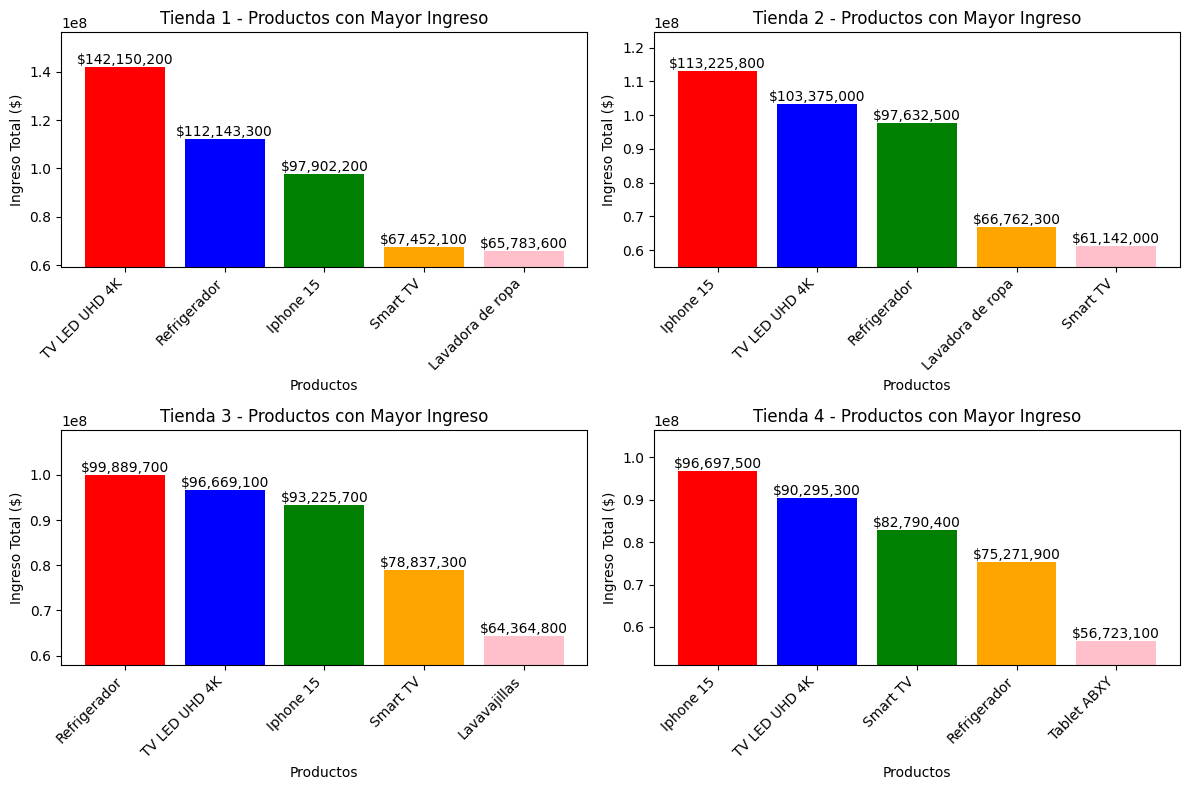

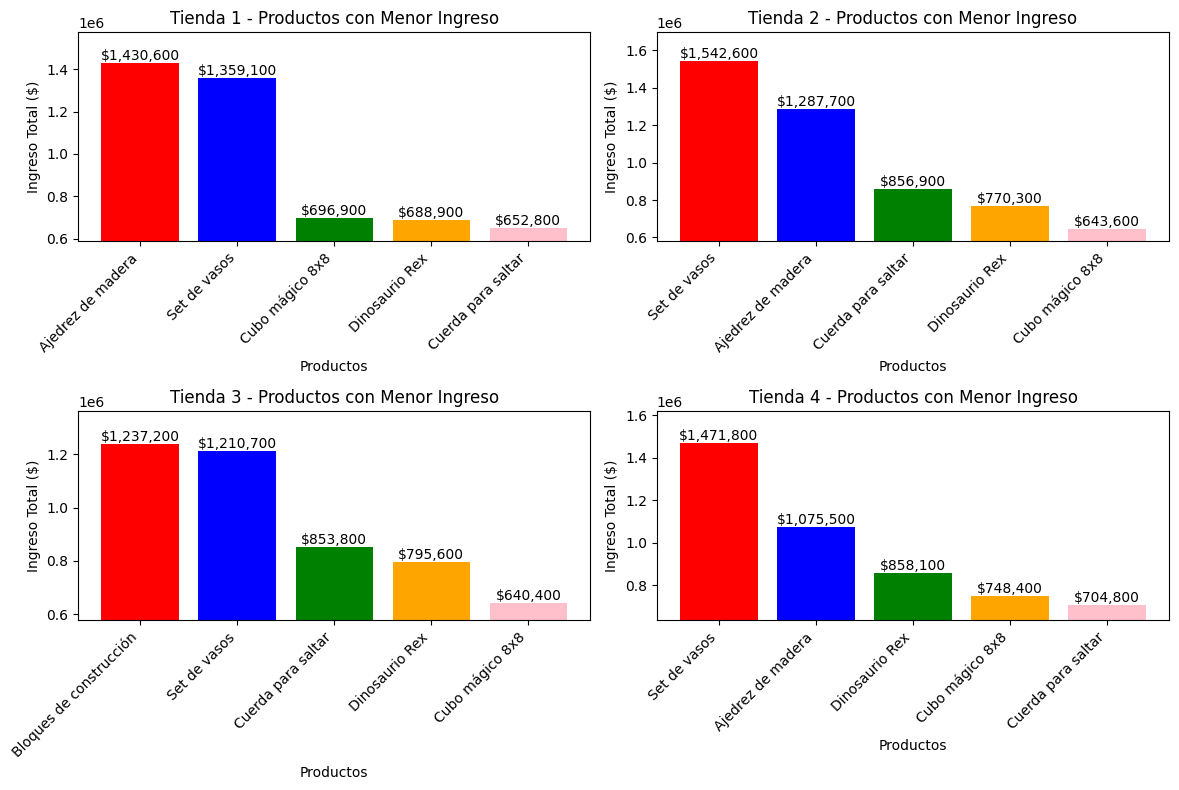

In [10]:
# Resultados finales
ingresos_por_producto = []

# Iterar sobre cada tienda
for tienda, nombre in zip(tiendas, nombres_tiendas):
    # Agrupar por producto y sumar los precios para obtener el ingreso total por producto
    ingresos_por_prod = tienda.groupby("Producto")["Precio"].sum().reset_index()
    ingresos_por_prod.columns = ['Producto', 'Ingreso Total']
    ingresos_por_prod['Tienda'] = nombre

    # Agregar resultados a la lista
    ingresos_por_producto.append(ingresos_por_prod)

# Concatenar todos los DataFrames en uno solo
df_ingresos_por_producto = pd.concat(ingresos_por_producto, ignore_index=True)

# Ordenar por ingreso total descendente
df_ingresos_por_producto = df_ingresos_por_producto.sort_values(by=["Tienda", "Ingreso Total"], ascending=[True, False])

# Mostrar los 5 productos que generaron más ingresos y los 5 que generaron menos ingresos de cada tienda
productos_mas_ingresos = []
productos_menos_ingresos = []

for nombre in nombres_tiendas:
    # Filtrar datos para la tienda actual
    datos_tienda = df_ingresos_por_producto[df_ingresos_por_producto['Tienda'] == nombre]

    # Obtener los 5 productos con más ingresos
    mas_ingresos = datos_tienda.head(5)
    productos_mas_ingresos.append(mas_ingresos)

    # Obtener los 5 productos con menos ingresos
    menos_ingresos = datos_tienda.tail(5)
    productos_menos_ingresos.append(menos_ingresos)

# Concatenar los resultados
df_mas_ingresos = pd.concat(productos_mas_ingresos, ignore_index=True)
df_menos_ingresos = pd.concat(productos_menos_ingresos, ignore_index=True)

# Imprimir resultados
print("Productos con Mayor Ingreso:")
print(df_mas_ingresos)
print("\n")

print("Productos con Menor Ingreso:")
print(df_menos_ingresos)
print("\n")

# -----------------------------
# Gráfica de Productos con Mayor Ingreso
# -----------------------------

# Configurar gráfica
plt.figure(figsize=(12, 8))

# Iterar sobre cada tienda y graficar
for i, nombre in enumerate(nombres_tiendas):
    # Filtrar datos para la tienda actual
    datos_tienda = df_mas_ingresos[df_mas_ingresos['Tienda'] == nombre]

    # Graficar
    plt.subplot(2, 2, i + 1) # 2x2 grid de subgráficas
    bars = plt.bar(datos_tienda['Producto'], datos_tienda['Ingreso Total'], color=["red", "blue", "green", "orange", "pink"])
    plt.ylim(0.9 * datos_tienda["Ingreso Total"].min(), 1.1 * datos_tienda["Ingreso Total"].max())

    # Agregar etiquetas de datos
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:,.0f}', ha='center', va='bottom')

    plt.title(f"{nombre} - Productos con Mayor Ingreso")
    plt.xlabel("Productos")
    plt.ylabel("Ingreso Total ($)")
    plt.xticks(rotation=45, ha="right")

# Ajustar espaciado
plt.tight_layout()

# Mostrar gráfica
plt.show()

# -----------------------------
# Gráfica de Productos con Menor Ingreso
# -----------------------------

# Configurar gráfica
plt.figure(figsize=(12, 8))

# Iterar sobre cada tienda y graficar
for i, nombre in enumerate(nombres_tiendas):
    # Filtrar datos para la tienda actual
    datos_tienda = df_menos_ingresos[df_menos_ingresos['Tienda'] == nombre]

    # Graficar
    plt.subplot(2, 2, i + 1) # 2x2 grid de subgráficas
    bars = plt.bar(datos_tienda['Producto'], datos_tienda['Ingreso Total'], color=["red", "blue", "green", "orange", "pink"])
    plt.ylim(0.9 * datos_tienda["Ingreso Total"].min(), 1.1 * datos_tienda["Ingreso Total"].max())

    # Agregar etiquetas de datos
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:,.0f}', ha='center', va='bottom')

    plt.title(f"{nombre} - Productos con Menor Ingreso")
    plt.xlabel("Productos")
    plt.ylabel("Ingreso Total ($)")
    plt.xticks(rotation=45, ha="right")

# Ajustar espaciado
plt.tight_layout()

# Mostrar gráfica
plt.show()

###**6. Valor del envío medio por tienda**

1.   Elemento de la lista
2.   Elemento de la lista



En este paso, calcularé el costo de envío promedio para cada tienda. El objetivo también es comprender cuánto se gasta en promedio en el envío de cada tienda, con la finalidad de tener todas las aristas sobre la mesa antes de entregar una recomendación.

     Tienda  Costo de Envío Promedio
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167




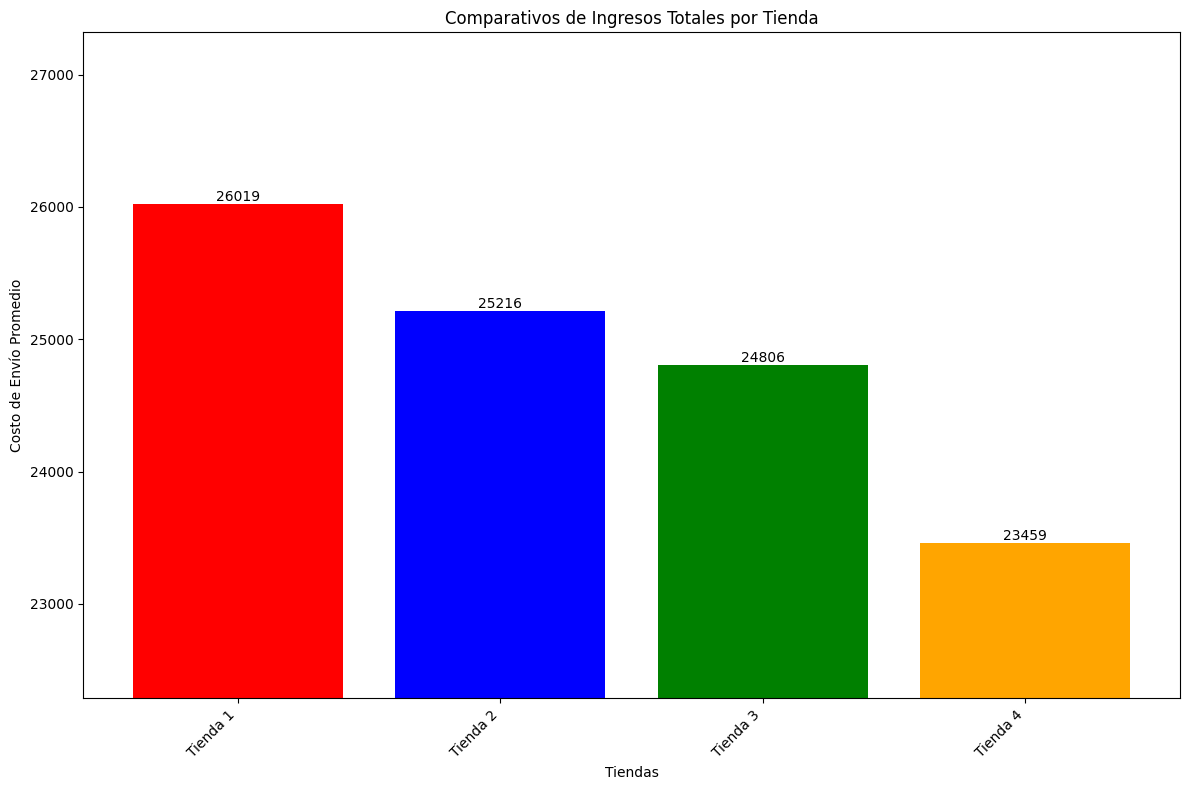

In [12]:
# Costo envío promedio
costo_envio_promedio = []

# Iterar sobre cada tienda
for tienda, nombre in zip(tiendas, nombres_tiendas):
    # Calcular el promedio del costo de envío, ignorando NaN
    promedio_costo_envio = tienda["Costo de envío"].mean()

    # Agregar resultados a la lista
    costo_envio_promedio.append({"Tienda": nombre, "Costo de Envío Promedio": promedio_costo_envio})

# Crear DataFrame
df_costo_envio_promedio = pd.DataFrame(costo_envio_promedio)
print(df_costo_envio_promedio)
print("\n")

# -----------------------------
# Gráfica de Costo de Envío Promedio
# -----------------------------

# Configurar gráfica
plt.figure(figsize=(12, 8))
bars = plt.bar(df_costo_envio_promedio["Tienda"], df_costo_envio_promedio["Costo de Envío Promedio"], color=["red", "blue", "green", "orange"])

# Agregar etiquetas de datos
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

# Ajustar el rango del eje Y
plt.ylim(0.95 * df_costo_envio_promedio["Costo de Envío Promedio"].min(), 1.05 * df_costo_envio_promedio["Costo de Envío Promedio"].max())

# Etiquetas y título
plt.xlabel("Tiendas")
plt.ylabel("Costo de Envío Promedio")
plt.title("Comparativos de Ingresos Totales por Tienda")

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha="right")

# Ajustar espaciado
plt.tight_layout()

# Mostrar gráfica
plt.show()

###**7. Visualización de resultados obtenidos**

Después de realizar diferentes análisis, se generarán visualizaciones mediante gráficos, que ayuden a comprender de una mejor manera los patrones y resultados obtenidos, representando una visión más completa de los datos.

Estos mostrarán puntos relevantes, tales como; los ingresos de la tienda, la distribución de categorías de productos, las opiniones de los clientes, los productos más vendidos y/o los costes de envío.

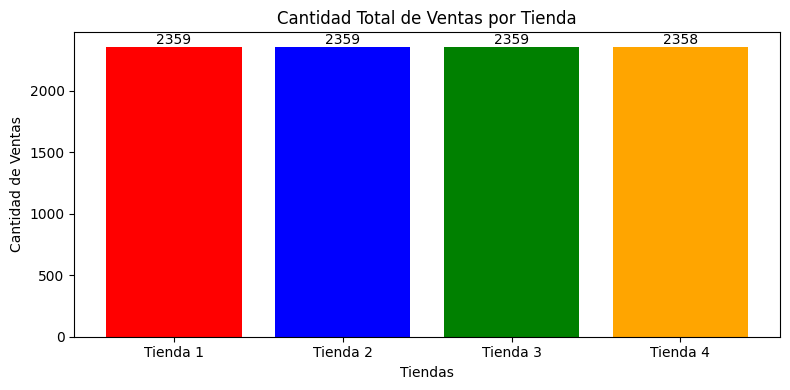

In [14]:
# 1. Gráfico de barras para el número total de ventas por tienda

# Contar el número de filas en cada DataFrame de tienda
conteo_ventas = [len(tienda_1), len(tienda_2), len(tienda_3), len(tienda_4)]

# Crear DataFrame
df_conteo_ventas = pd.DataFrame({'Tienda': nombres_tiendas, 'Cantidad de Ventas': conteo_ventas})

# Configurar gráfica
plt.figure(figsize=(8, 4))
bars = plt.bar(df_conteo_ventas['Tienda'], df_conteo_ventas['Cantidad de Ventas'], color=["red", "blue", "green", "orange"])

# Agregar etiquetas de datos
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Etiquetas y título
plt.xlabel("Tiendas")
plt.ylabel("Cantidad de Ventas")
plt.title("Cantidad Total de Ventas por Tienda")

# Ajustar espaciado
plt.tight_layout()

# Mostrar gráfica
plt.show()

**- Aspectos Destacados del Gráfico de Cantidad Total de Ventas por Tienda:**

Este gráfico de barras nos permite comparar rápidamente el volumen total de ventas en cada tienda. Podemos identificar visualmente qué tienda tiene el mayor número de transacciones y cuáles se encuentran rezagadas en términos de cantidad de productos vendidos.

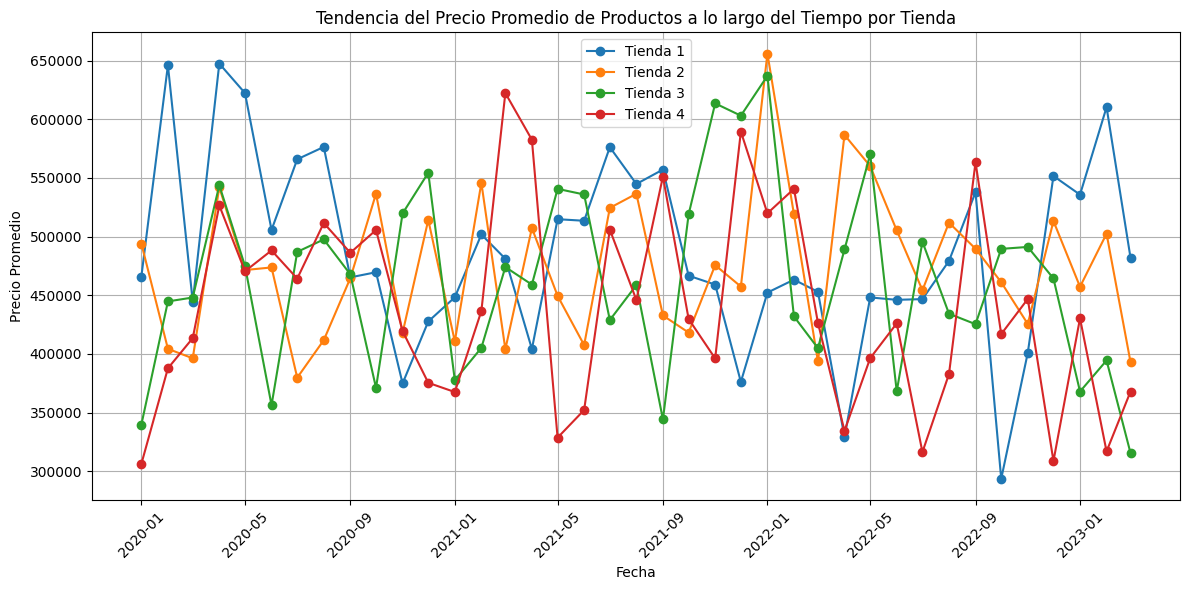

In [15]:
# 2. Gráfico de líneas para la tendencia del precio promedio a lo largo del tiempo por tienda

# Convertir la columna 'Fecha de Compra' a datetime
for tienda in tiendas:
    tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], format='%d/%m/%Y')

# Agrupar por mes y año y calcular el precio promedio
tendencia_precio = []
for tienda, nombre in zip(tiendas, nombres_tiendas):
    tienda_agrupada = tienda.groupby(tienda['Fecha de Compra'].dt.to_period('M'))['Precio'].mean().reset_index()
    tienda_agrupada['Tienda'] = nombre
    tendencia_precio.append(tienda_agrupada)

df_tendencia_precio = pd.concat(tendencia_precio)
df_tendencia_precio['Fecha de Compra'] = df_tendencia_precio['Fecha de Compra'].dt.to_timestamp()


# Configurar gráfica
plt.figure(figsize=(12, 6))

for nombre in nombres_tiendas:
    datos_tienda = df_tendencia_precio[df_tendencia_precio['Tienda'] == nombre]
    plt.plot(datos_tienda['Fecha de Compra'], datos_tienda['Precio'], marker='o', linestyle='-', label=nombre)

# Etiquetas y título
plt.xlabel("Fecha")
plt.ylabel("Precio Promedio")
plt.title("Tendencia del Precio Promedio de Productos a lo largo del Tiempo por Tienda")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfica
plt.show()

**- Aspectos Destacados del Gráfico de Tendencia del Precio Promedio:**

Este gráfico de líneas es útil para observar cómo ha evolucionado el precio promedio de los productos en cada tienda a lo largo del tiempo. Podemos identificar tendencias, estacionalidad o cambios significativos en los precios que puedan haber afectado los ingresos. La comparación de las líneas de cada tienda nos muestra si alguna tiene un comportamiento atípico en sus precios promedio.

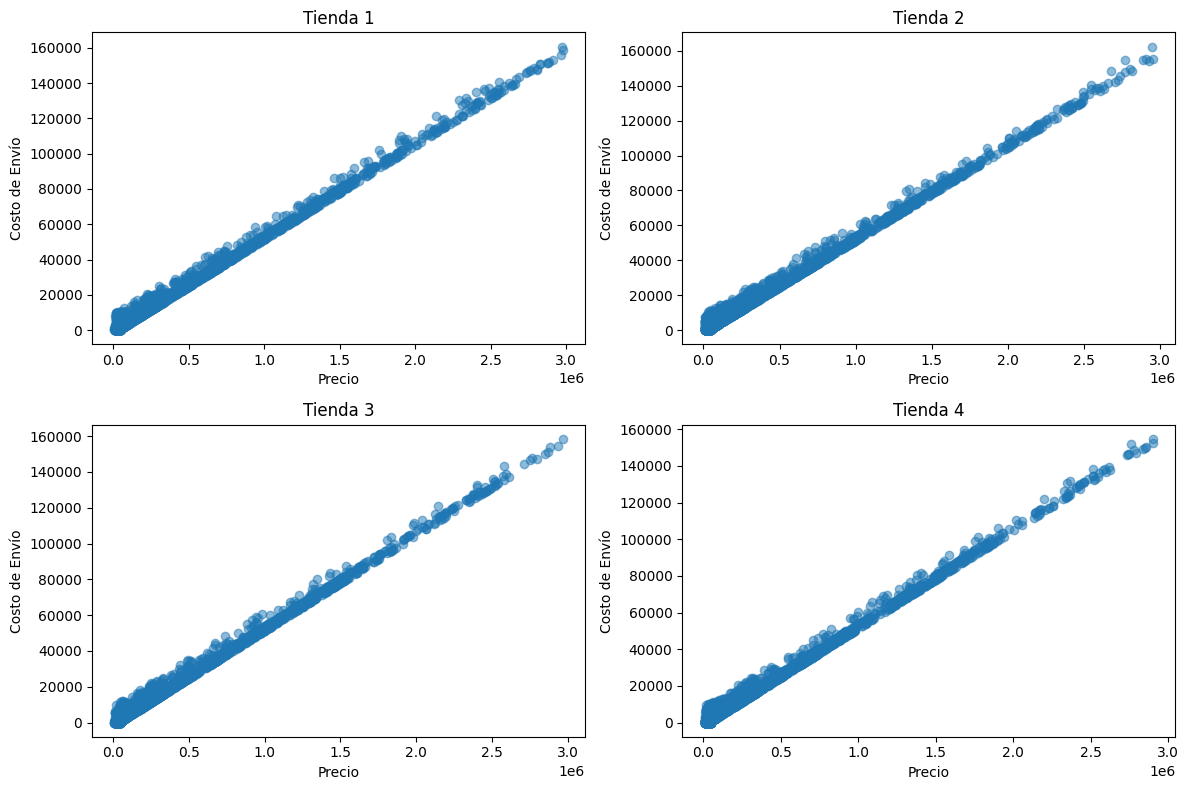

In [16]:
# 3. Gráfico de dispersión para la relación entre Precio y Costo de Envío por tienda

# Configurar gráfica
plt.figure(figsize=(12, 8))

for i, (tienda, nombre) in enumerate(zip(tiendas, nombres_tiendas)):
    plt.subplot(2, 2, i + 1) # 2x2 grid de subgráficas
    plt.scatter(tienda['Precio'], tienda['Costo de envío'], alpha=0.5) # alpha para transparencia

    plt.title(f"{nombre}")
    plt.xlabel("Precio")
    plt.ylabel("Costo de Envío")


# Ajustar espaciado
plt.tight_layout()

# Mostrar gráfica
plt.show()

**- Aspectos Destacados del Gráfico de Dispersión (Precio vs. Costo de Envío):**

Este gráfico de dispersión nos ayuda a visualizar la relación entre el precio de los productos y el costo de envío para cada tienda. Podemos identificar si existe una correlación entre estas dos variables (por ejemplo, si los productos más caros tienen costos de envío más altos) y si hay alguna tienda que se desvíe de este patrón, lo que podría indicar ineficiencias en la gestión de envíos o estrategias de precios diferentes.


En este paso, calcularé la utilidad promedio por venta para cada tienda. Esto nos ayudará a entender la rentabilidad promedio de cada transacción, considerando el precio y el costo de envío.


Utilidad Promedio por Venta por Tienda:
     Tienda  Utilidad Promedio por Venta
0  Tienda 1                461849.300551
1  Tienda 2                448011.191183
2  Tienda 3                440654.090716
3  Tienda 4                416903.435115




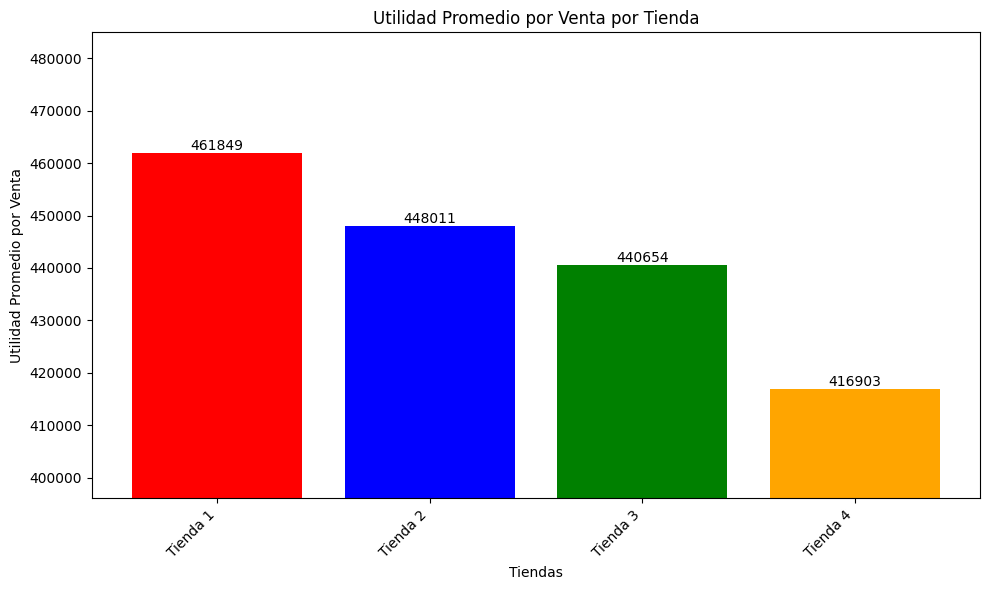

In [17]:
# Calcular la utilidad promedio por venta para cada tienda
utilidad_promedio_por_venta = []

for tienda, nombre in zip(tiendas, nombres_tiendas):
    # Asegurarse de que la columna 'Utilidad' exista (fue creada en el paso 3)
    if 'Utilidad' in tienda.columns:
        # Calcular la utilidad promedio, ignorando NaN
        promedio_utilidad = tienda['Utilidad'].mean()
        utilidad_promedio_por_venta.append({"Tienda": nombre, "Utilidad Promedio por Venta": promedio_utilidad})
    else:
        print(f"La columna 'Utilidad' no existe en {nombre}. Asegúrate de ejecutar el paso 3 primero.")


# Crear DataFrame
df_utilidad_promedio_por_venta = pd.DataFrame(utilidad_promedio_por_venta)

# Ordenar por utilidad promedio por venta descendente
df_utilidad_promedio_por_venta = df_utilidad_promedio_por_venta.sort_values(by="Utilidad Promedio por Venta", ascending=False)

# Mostrar DataFrame
print("\nUtilidad Promedio por Venta por Tienda:")
print(df_utilidad_promedio_por_venta)
print("\n")

# Configurar gráfica
plt.figure(figsize=(10, 6))
bars = plt.bar(df_utilidad_promedio_por_venta["Tienda"], df_utilidad_promedio_por_venta["Utilidad Promedio por Venta"], color=["red", "blue", "green", "orange"])

# Agregar etiquetas de datos
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

# Ajustar el rango del eje Y
plt.ylim(0.95 * df_utilidad_promedio_por_venta["Utilidad Promedio por Venta"].min(), 1.05 * df_utilidad_promedio_por_venta["Utilidad Promedio por Venta"].max())


# Etiquetas y título
plt.title("Utilidad Promedio por Venta por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Utilidad Promedio por Venta")
plt.xticks(rotation=45, ha="right")

# Ajustar espaciado
plt.tight_layout()

# Mostrar gráfica
plt.show()

## **Informe Final: Análisis de Tiendas Alura Store para Recomendación de Venta**

### **Introducción**

El presente informe tiene como objetivo analizar los datos de ventas, rendimiento y reseñas de las cuatro tiendas de la cadena Alura Store, con el fin de recomendar al Sr. Juan cuál de ellas debería vender para iniciar un nuevo emprendimiento. Se han considerado diversos factores clave para evaluar la eficiencia y rentabilidad de cada tienda.

### **Desarrollo del Análisis y Presentación de Datos**

Para llegar a una recomendación informada, se han realizado los siguientes análisis y generado las visualizaciones correspondientes:

*   **Ingresos Totales por Tienda:** Se calculó y graficó el ingreso total generado por cada tienda (Ver Gráfico 1: Comparativos de Ingresos Totales por Tienda). Este análisis inicial nos proporciona una visión general del desempeño financiero de cada sucursal.

*   **Ventas por Categoría:** Se identificaron las categorías de productos más y menos vendidas en cada tienda (Ver Gráfico 2: Categorías más Populares por Tiendas). Esto ayuda a comprender las preferencias de los clientes en cada ubicación y la diversidad del inventario.

*   **Utilidad después de Costos de Envío:** Se calculó la utilidad total de cada tienda después de restar los costos de envío (Ver Gráfico 3: Utilidad Total por Tienda). Este indicador es crucial para evaluar la rentabilidad real de las operaciones.

*   **Valoración Media por Tienda:** Se determinó la calificación promedio de los clientes para cada tienda (Ver Gráfico 4: Calificación Promedio por Tienda). La satisfacción del cliente es un factor importante para el éxito a largo plazo.

*   **Productos más y menos Vendidos:** Se identificaron los productos que generaron mayores y menores ingresos en cada tienda (Ver Gráfico 5 y 6: Productos con Mayor/Menor Ingreso). Esto permite conocer el desempeño individual de los productos.

*   **Valor del Envío Medio por Tienda:** Se calculó el costo de envío promedio por transacción para cada tienda (Ver Gráfico 7: Comparativos de Ingresos Totales por Tienda - *Nota: este título en el gráfico original parece incorrecto y debería referirse al costo de envío*). Este dato complementa el análisis de utilidad.

*   **Cantidad Total de Ventas por Tienda:** Se visualizó el volumen de transacciones en cada tienda (Ver Gráfico 8: Cantidad Total de Ventas por Tienda).

*   **Tendencia del Precio Promedio a lo largo del Tiempo:** Se analizó la evolución del precio promedio de los productos en cada tienda a lo largo del tiempo (Ver Gráfico 9: Tendencia del Precio Promedio de Productos a lo largo del Tiempo por Tienda).

*   **Relación entre Precio y Costo de Envío:** Se visualizó la correlación entre el precio de los productos y su costo de envío en cada tienda (Ver Gráfico 10: Gráfico de Dispersión (Precio vs. Costo de Envío)).

*   **Utilidad Promedio por Venta:** Se calculó la utilidad promedio generada por cada venta en cada tienda (Ver Gráfico 11: Utilidad Promedio por Venta por Tienda). Este es un indicador clave de la eficiencia operativa.

### **Conclusión y Recomendación**

Con base en el análisis exhaustivo de los datos, se observa que la **Tienda 4** consistentemente presenta los indicadores de rendimiento más bajos en comparación con las otras tres tiendas.

*   **Menor Ingreso Total:** La Tienda 4 registra el ingreso total más bajo.
*   **Menor Utilidad Total:** La utilidad total después de costos de envío es la menor en la Tienda 4.
*   **Menor Utilidad Promedio por Venta:** La rentabilidad promedio por transacción es inferior en la Tienda 4.
*   **Menor Calificación Promedio (aunque cercana a las otras):** Si bien la diferencia no es abismal, la Tienda 4 tiene la calificación promedio más baja.
*   **Menor Cantidad Total de Ventas:** La Tienda 4 tiene el menor volumen de ventas.

Si bien el costo de envío promedio en la Tienda 4 es ligeramente más bajo, esto no compensa su menor desempeño en las métricas de ingresos, utilidad y volumen de ventas. Las categorías de productos más vendidas son similares en todas las tiendas, lo que sugiere que el problema en la Tienda 4 no reside en la popularidad de sus productos, sino en otros factores operativos o de mercado.

**Recomendación:**

Considerando todos los factores analizados, se recomienda al Sr. Juan **vender la Tienda 4**. Esta tienda muestra consistentemente el rendimiento más bajo en términos de ingresos, utilidad y volumen de ventas, lo que la convierte en la candidata menos rentable de la cadena Alura Store. La venta de esta sucursal permitiría al Sr. Juan optimizar su portafolio de negocios y enfocar sus recursos en otros negocios con mayor potencial de crecimiento y rentabilidad.

## Prepararando los datos geográficos

### Subtask:
Se normalizarán las columnas de latitud y longitud, para que estén en un formato adecuado para la visualización.


In [24]:
# Se asegurará de que las columnas 'lat' y 'lon' sean númericas.
for tienda, nombre in zip(tiendas, nombres_tiendas):
    if 'lat' in tienda.columns and 'lon' in tienda.columns:
        # Convertir 'lat' a numérico, forzando errores a NaN
        tienda['lat'] = pd.to_numeric(tienda['lat'], errors='coerce')
        # Convertir 'lon' a numérico, forzando errores a NaN
        tienda['lon'] = pd.to_numeric(tienda['lon'], errors='coerce')
        print(f"Se verificaron y convirtieron las columnas 'lat' y 'lon' para {nombre}.")
    else:
        print(f"No se encontraron las columnas 'lat' o 'lon' en {nombre}.")

# Mostrar los tipos de datos de 'lat' y 'lon' para uno de los dataframes como verificación
if 'lat' in tienda_1.columns and 'lon' in tienda_1.columns:
    print("\nTipos de datos después de la conversión para Tienda 1:")
    print(tienda_1[['lat', 'lon']].dtypes)

Checked and converted 'lat' and 'lon' columns for Tienda 1.
Checked and converted 'lat' and 'lon' columns for Tienda 2.
Checked and converted 'lat' and 'lon' columns for Tienda 3.
Checked and converted 'lat' and 'lon' columns for Tienda 4.

Data types after conversion for Tienda 1:
lat    float64
lon    float64
dtype: object


## Visualizar la distribución geográfica de las ventas

### Subtask:
Se creará un gráfico de dispersión para mostrar la ubicación de las ventas de cada tienda.


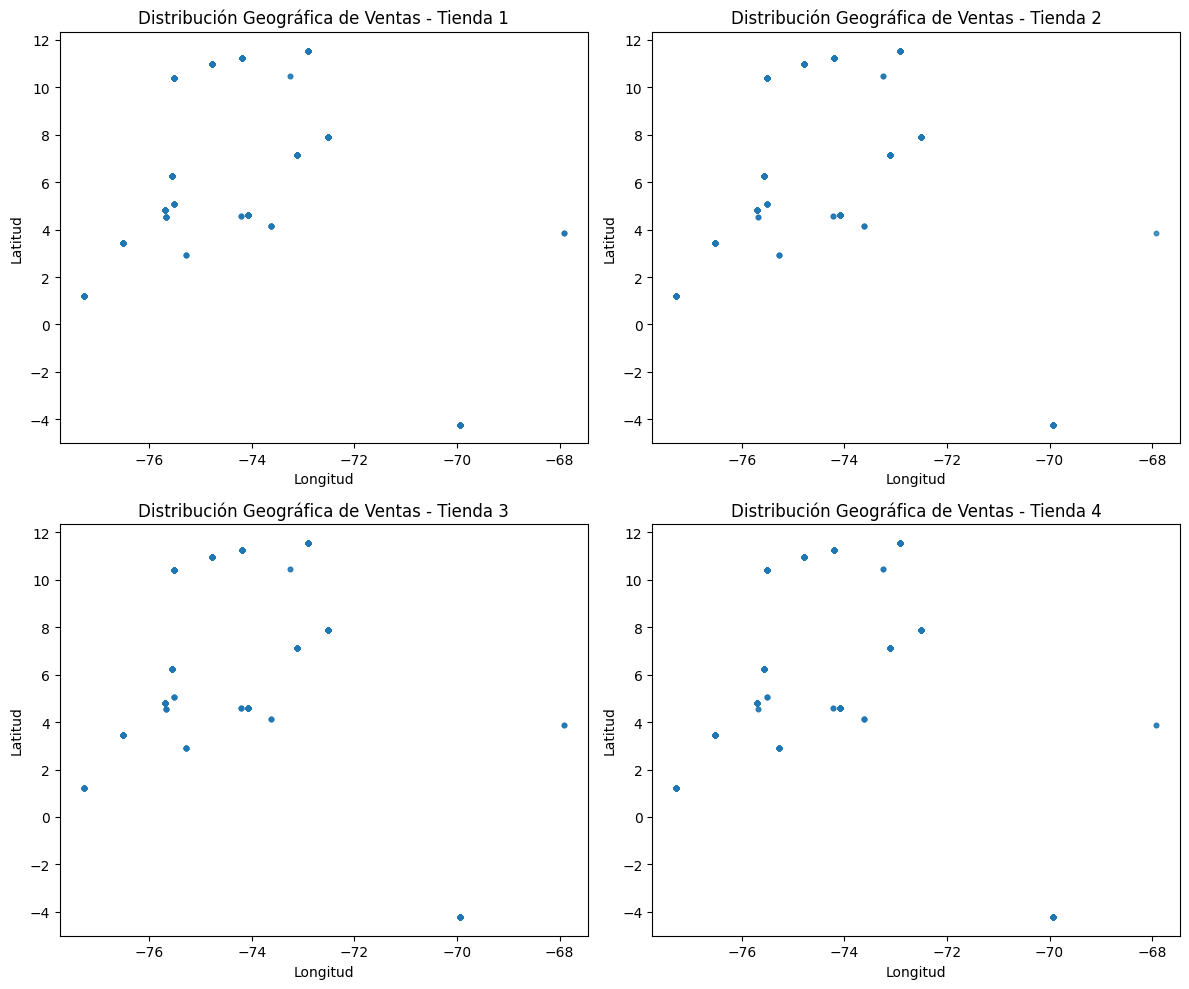

In [19]:
# Crear gráficos de dispersión para la distribución geográfica de las ventas por tienda
plt.figure(figsize=(12, 10))

for i, (tienda, nombre) in enumerate(zip(tiendas, nombres_tiendas)):
    plt.subplot(2, 2, i + 1) # Crear una cuadrícula de 2x2 de subgráficas
    # Graficar latitud vs longitud
    plt.scatter(tienda['lon'], tienda['lat'], alpha=0.5, s=10) # Usar alpha para transparencia y s para tamaño

    plt.title(f"Distribución Geográfica de Ventas - {nombre}")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")

# Ajustar el diseño para evitar la superposición de títulos y etiquetas
plt.tight_layout()

# Mostrar los gráficos
plt.show()